In [1]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt

#### raw image histogram

(<Axes: >, [<matplotlib.lines.Line2D at 0x29c7dc8efd0>])

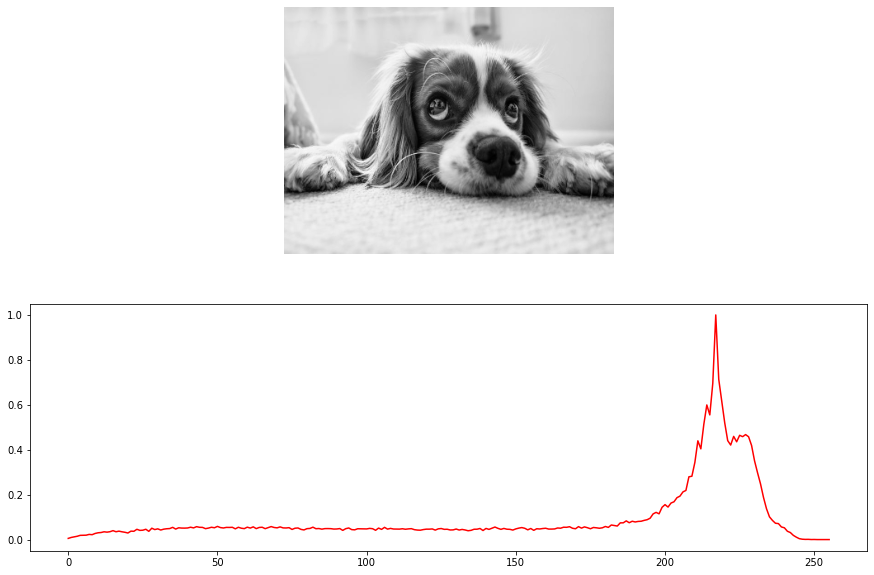

In [2]:
img = cv2.imread('./puppy.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img,(400,300))

plt.figure(figsize=(15,10))
plt.subplot(211), plt.imshow(img, 'gray'), plt.axis("off")
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
hist = (hist - np.min(hist)) / (np.max(hist) - np.min(hist))
plt.subplot(212), plt.plot(hist,color='r')

#### equalize histogram

(<Axes: >, [<matplotlib.lines.Line2D at 0x29c00096190>])

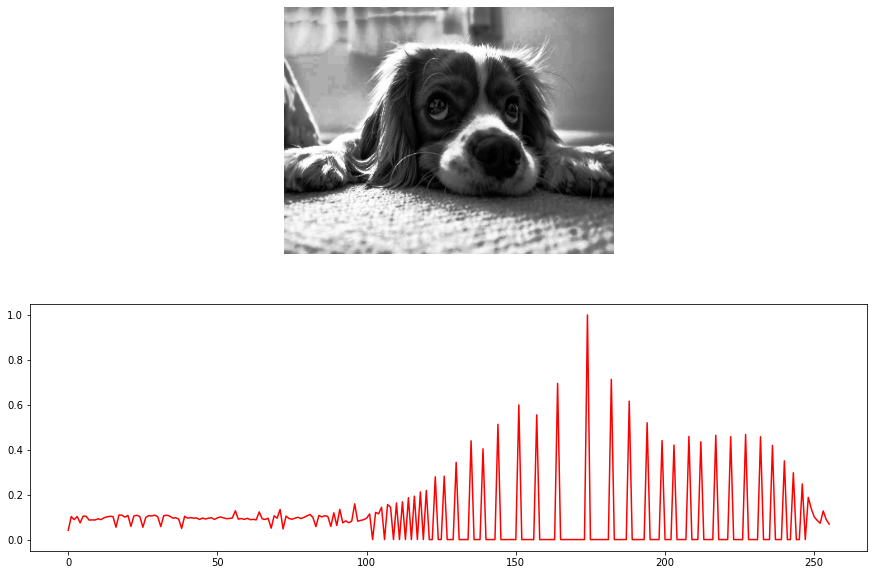

In [3]:
eq = cv2.equalizeHist(img)

plt.figure(figsize=(15,10))
plt.subplot(211), plt.imshow(eq,'gray'), plt.axis("off")
eqHist = cv2.calcHist([eq], [0], None, [256], [0, 256])
eqHist = (eqHist - np.min(eqHist)) / (np.max(eqHist) - np.min(eqHist))
plt.subplot(212), plt.plot(eqHist,color='r')

#### 90 flip image histogram

(<Axes: >, [<matplotlib.lines.Line2D at 0x29c7dbacb50>])

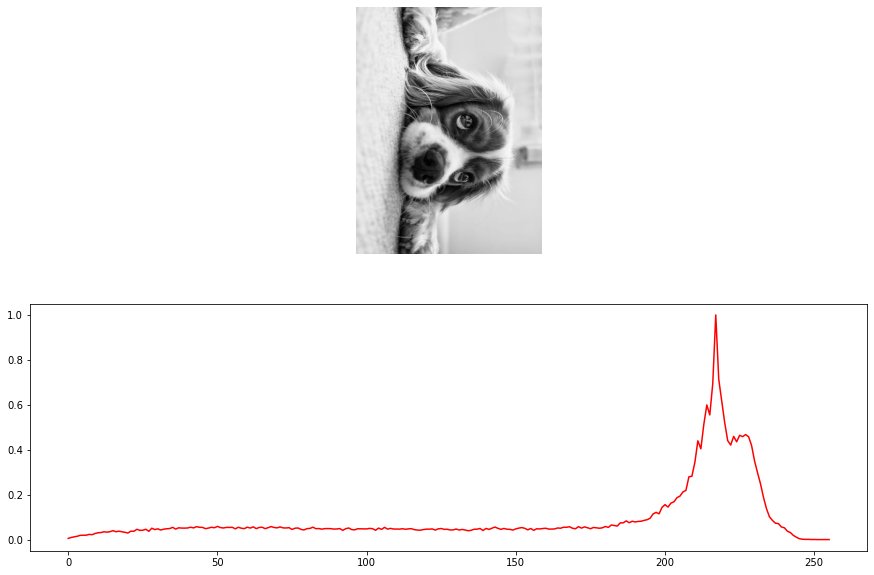

In [4]:
img90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

plt.figure(figsize=(15,10))
plt.subplot(211), plt.imshow(img90,'gray'), plt.axis("off")
hist90 = cv2.calcHist([img90], [0], None, [256], [0, 256])
hist90 = (hist90 - np.min(hist90)) / (np.max(hist90) - np.min(hist90))
plt.subplot(212), plt.plot(hist90,color='r')

#### resized image histogram

(<Axes: >, [<matplotlib.lines.Line2D at 0x29c016aaa10>])

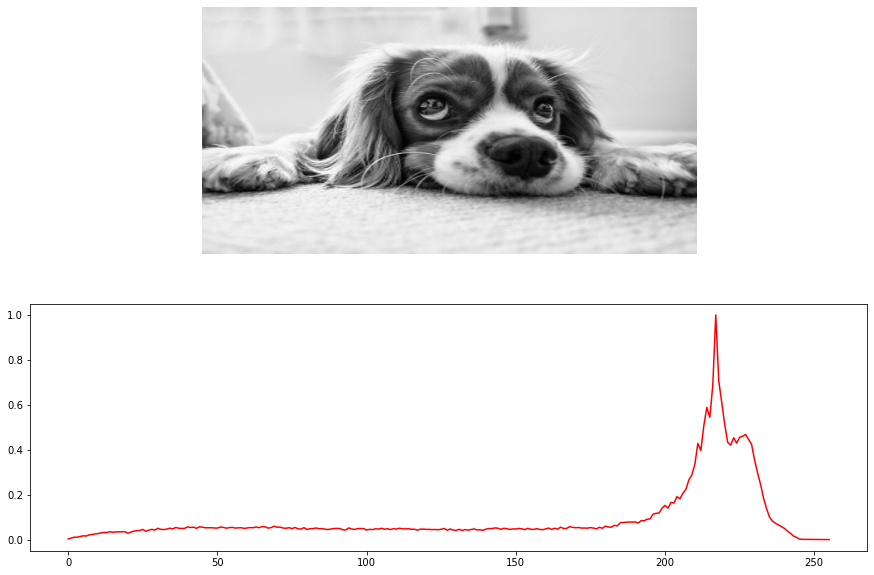

In [5]:
resized_img = cv2.resize(img, (600, 300))

plt.figure(figsize=(15,10))
plt.subplot(211), plt.imshow(resized_img,'gray'), plt.axis("off")
resized_hist = cv2.calcHist([resized_img], [0], None, [256], [0, 256])
resized_hist = (resized_hist - np.min(resized_hist)) / (np.max(resized_hist) - np.min(resized_hist))
plt.subplot(212), plt.plot(resized_hist,color='r')

#### test image histogram

(<Axes: >, [<matplotlib.lines.Line2D at 0x29c0136aa10>])

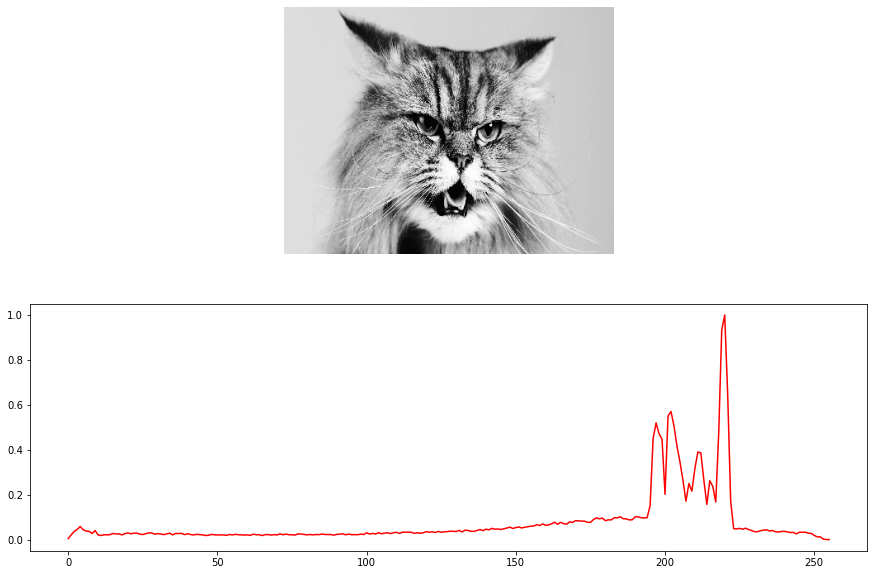

In [6]:
test = cv2.imread('./cat.png', cv2.IMREAD_GRAYSCALE)
test = cv2.resize(test,(400,300))

plt.figure(figsize=(15,10))
plt.subplot(211), plt.imshow(test, 'gray'), plt.axis("off")
T_hist = cv2.calcHist([test], [0], None, [256], [0, 256])
T_hist = (T_hist - np.min(T_hist)) / (np.max(T_hist) - np.min(T_hist))
plt.subplot(212), plt.plot(T_hist,color='r')

## Compare Histogram

In [7]:
def compareHistogram(hist1, hist2):
    metric_val1 = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)
    metric_val2 = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR)
    metric_val3 = cv2.compareHist(hist1, hist2, cv2.HISTCMP_INTERSECT)
    metric_val4 = cv2.compareHist(hist1, hist2, cv2.HISTCMP_BHATTACHARYYA)
    print("Metric Value using Correlation Hist Comp Method", metric_val1)
    print("Metric Value using Chi Square Hist Comp Method", metric_val2)
    print("Metric Value using Intersection Hist Comp Method", metric_val3)
    print("Metric Value using Bhattacharyya Hist Comp Method", metric_val4)

#### raw img, equalized img

In [8]:
compareHistogram(hist, eqHist)

Metric Value using Correlation Hist Comp Method 0.020564706638123167
Metric Value using Chi Square Hist Comp Method 318.06040893736144
Metric Value using Intersection Hist Comp Method 8.510878317116294
Metric Value using Bhattacharyya Hist Comp Method 0.6700795568718592


#### raw img, 90 flip img

In [9]:
compareHistogram(hist, hist90)

Metric Value using Correlation Hist Comp Method 1.0
Metric Value using Chi Square Hist Comp Method 0.0
Metric Value using Intersection Hist Comp Method 24.174053075374104
Metric Value using Bhattacharyya Hist Comp Method 1.0536712127723509e-08


#### raw img, resized img

In [10]:
compareHistogram(hist, resized_hist)

Metric Value using Correlation Hist Comp Method 0.999615575430961
Metric Value using Chi Square Hist Comp Method 0.06669439379352483
Metric Value using Intersection Hist Comp Method 23.625898409605725
Metric Value using Bhattacharyya Hist Comp Method 0.018836709335052482


#### raw img, test img

In [11]:
compareHistogram(hist, T_hist)

Metric Value using Correlation Hist Comp Method 0.5527099768478514
Metric Value using Chi Square Hist Comp Method 23.686751365888544
Metric Value using Intersection Hist Comp Method 14.330540826660581
Metric Value using Bhattacharyya Hist Comp Method 0.3138229317289923
